# Intro to Programming: Extracurricular - Data Analysis

## Investigate a Dataset: Soccer Database
<br>

### Section 1: Introduction to Data

### Section 2: Data Wrangling & Cleaning

### Section 3: Exploration of Data & Analysis

### Section 4: Conclusions



### Section 1: Introduction to Data

##### Overview
The data being worked on here was taken from a database housing data about soccer teams, players, and matches in Europe. The downloaded database contains data organized into 7 tables : Country, League, Match, Player, Player_Attributes, Team, and Team_Attributes. This information is from 7 total seasons of soccer, spanning from 2008 to 2015. 

##### Notes on Data
There are a few things about the data that need to be acknowledged. The countries included in the data are limited to 11 countries. Along with the 11 countries, there is only one league per country, the highest level league of that country. Additionally, although team goals are recorded, the match table doesn't include any information on the player that scored the goal. 

### Section 2: Data Wrangling and Cleaning

In this section, I took the raw data from the downloaded file and organized and cleaned it. I created dataframes for Player, Team, and Match, using all the information from the file. I then used these dataframes to create additional referene tables and arrays as well as dataframes to use to derive meaningful information. Below is the documented wrangling and cleaning of the data.


In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

conn = sqlite3.connect('database.sqlite')

Player = pd.read_sql("SELECT * FROM Player", conn)
Player_Attributes = pd.read_sql("SELECT * FROM Player_Attributes", conn)
Country = pd.read_sql("SELECT * FROM country", conn)
League = pd.read_sql("SELECT * FROM league", conn)
Match = pd.read_sql("SELECT * FROM match", conn)
Team = pd.read_sql("SELECT * FROM team", conn)
Team_Attributes = pd.read_sql("SELECT * FROM team_attributes", conn)


conn.commit
conn.close

<function Connection.close>

In [3]:
Complete_Team = pd.merge(Team, Team_Attributes, on = "team_api_id")
Complete_Team = Complete_Team.drop_duplicates(subset = "team_api_id")

Complete_Player = pd.merge(Player, Player_Attributes, on = "player_api_id")
Complete_Player = Complete_Player.drop_duplicates(subset = "player_name")

#adding 'age' column to Complete_Player dataframe
bday_array = Complete_Player['birthday'].values
dates_list = [dt.strptime(date, "%Y-%m-%d %H:%M:%S").date() for date in bday_array]#this stores datetime objects
bday_years = []
counter = 0
while counter < len(dates_list):
    bday_years.append(dates_list[counter].year)  #this fills bday_years[] with years
    counter += 1

age_array = []
x = 0 
while x < len(dates_list):
    age_array.append(2018-bday_years[x]) # 2018 - year born
    x +=1
Complete_Player['age'] = age_array


In [4]:
### changing Match date column values to datetime objects and then storing month in month column
match_date_values = Match.date.values

datetime_objs = [dt.strptime(date, "%Y-%m-%d %H:%M:%S") for date in match_date_values]#this stores datetime objects
match_month_dates_stored = []
for x in datetime_objs:
    match_month_dates_stored.append(x.month)
    
### adding new column to Match dataframe called 'date_month'
Match['date_month'] = match_month_dates_stored


In [5]:
### creating dataframe to house only goal related columns from the Match dataframe
goals_scored_df = pd.DataFrame()
goals_scored_df['home team goals'] = Match.home_team_goal.values
goals_scored_df['home team id'] = Match.home_team_api_id
goals_scored_df['season'] = Match.season
goals_scored_df['away team goals'] = Match.away_team_goal.values
goals_scored_df['away team id'] = Match.away_team_api_id
goals_scored_df['match month'] = Match.date_month


In [6]:

### creating dataframes to store data retrieved from goals scored dataframe
home_team_goals_scored_2008 = pd.DataFrame(columns = ['home team goals','home team id', 'match month'])
away_team_goals_scored_2008 = pd.DataFrame(columns = ['away team goals','away team id', 'match month'])

home_team_goals_scored_2009 = pd.DataFrame(columns = ['home team goals','home team id', 'match month'])
away_team_goals_scored_2009 = pd.DataFrame(columns = ['away team goals','away team id', 'match month'])

home_team_goals_scored_2010 = pd.DataFrame(columns = ['home team goals','home team id', 'match month'])
away_team_goals_scored_2010 = pd.DataFrame(columns = ['away team goals','away team id', 'match month'])

home_team_goals_scored_2011 = pd.DataFrame(columns = ['home team goals','home team id', 'match month'])
away_team_goals_scored_2011 = pd.DataFrame(columns = ['away team goals','away team id', 'match month'])

home_team_goals_scored_2012 = pd.DataFrame(columns = ['home team goals','home team id', 'match month'])
away_team_goals_scored_2012 = pd.DataFrame(columns = ['away team goals','away team id', 'match month'])

home_team_goals_scored_2013 = pd.DataFrame(columns = ['home team goals','home team id', 'match month'])
away_team_goals_scored_2013 = pd.DataFrame(columns = ['away team goals','away team id', 'match month'])

home_team_goals_scored_2014 = pd.DataFrame(columns = ['home team goals','home team id', 'match month'])
away_team_goals_scored_2014 = pd.DataFrame(columns = ['away team goals','away team id', 'match month'])

home_team_goals_scored_2015 = pd.DataFrame(columns = ['home team goals','home team id', 'match month'])
away_team_goals_scored_2015 = pd.DataFrame(columns = ['away team goals','away team id', 'match month'])

### housing dataframes in an array, to be used with if else statement
home_team_goals_array_of_dfs = [home_team_goals_scored_2008, home_team_goals_scored_2009,
                               home_team_goals_scored_2010, home_team_goals_scored_2011,
                               home_team_goals_scored_2012, home_team_goals_scored_2013,
                               home_team_goals_scored_2014, home_team_goals_scored_2015]
away_team_goals_array_of_dfs = [away_team_goals_scored_2008, away_team_goals_scored_2009,
                               away_team_goals_scored_2010, away_team_goals_scored_2011,
                               away_team_goals_scored_2012, away_team_goals_scored_2013,
                               away_team_goals_scored_2014, away_team_goals_scored_2015]

### array holding seasons as they appear in goals scored df, using in if else statement
seasons_array = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', 
                 '2013/2014', '2014/2015', '2015/2016']

### going through goals scored df and adding home team goal columns to correct season df
for index, row in goals_scored_df.iterrows():
    if row['season'] == seasons_array[0]:
        home_team_goals_array_of_dfs[0].loc[index] = row
        away_team_goals_array_of_dfs[0].loc[index] = row
        
    elif row['season'] == seasons_array[1]:
        home_team_goals_array_of_dfs[1].loc[index] = row
        away_team_goals_array_of_dfs[1].loc[index] = row
        
    elif row['season'] == seasons_array[2]:
        home_team_goals_array_of_dfs[2].loc[index] = row
        away_team_goals_array_of_dfs[2].loc[index] = row
        
    elif row['season'] == seasons_array[3]:
        home_team_goals_array_of_dfs[3].loc[index] = row
        away_team_goals_array_of_dfs[3].loc[index] = row
        
    elif row['season'] == seasons_array[4]:
        home_team_goals_array_of_dfs[4].loc[index] = row
        away_team_goals_array_of_dfs[4].loc[index] = row
        
    elif row['season'] == seasons_array[5]:
        home_team_goals_array_of_dfs[5].loc[index] = row
        away_team_goals_array_of_dfs[5].loc[index] = row
        
    elif row['season'] == seasons_array[6]:
        home_team_goals_array_of_dfs[6].loc[index] = row
        away_team_goals_array_of_dfs[6].loc[index] = row
        
    elif row['season'] == seasons_array[7]:
        home_team_goals_array_of_dfs[7].loc[index] = row
        away_team_goals_array_of_dfs[7].loc[index] = row



In [7]:
### creating total goals dataframes to store home and away total goals grouped by team 
total_goals_2008 = pd.concat((home_team_goals_array_of_dfs[0].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[0].groupby('away team id').sum()), axis = 1)
total_goals_2009 = pd.concat((home_team_goals_array_of_dfs[1].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[1].groupby('away team id').sum()), axis = 1)
total_goals_2010 = pd.concat((home_team_goals_array_of_dfs[2].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[2].groupby('away team id').sum()), axis = 1)
total_goals_2011 = pd.concat((home_team_goals_array_of_dfs[3].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[3].groupby('away team id').sum()), axis = 1)
total_goals_2012 = pd.concat((home_team_goals_array_of_dfs[4].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[4].groupby('away team id').sum()), axis = 1)
total_goals_2013 = pd.concat((home_team_goals_array_of_dfs[5].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[5].groupby('away team id').sum()), axis = 1)
total_goals_2014 = pd.concat((home_team_goals_array_of_dfs[6].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[6].groupby('away team id').sum()), axis = 1)
total_goals_2015 = pd.concat((home_team_goals_array_of_dfs[7].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[7].groupby('away team id').sum()), axis = 1)

total_goals_array_of_seasons = [total_goals_2008,total_goals_2009,total_goals_2010,
                               total_goals_2011,total_goals_2012,total_goals_2013,
                               total_goals_2014,total_goals_2015]


### adding third column to total goals dataframe that stores sum of away and home goals
counter = 0
while counter < len(total_goals_array_of_seasons):
    total_goals_array_of_seasons[counter]['total goals'] = total_goals_array_of_seasons[counter]['home team goals'] + total_goals_array_of_seasons[counter]['away team goals']
    counter +=1
    

### Section 3: Exploration of Data & Analysis

### Correlation questions
1. Is player __height__ and __sprint speed__ correlated? 

2. Is player __height__ correlated with player __strength__?

3. Does __age__ correlate with __sprint speed__?

4. How does being __home team__ correlate with number of __goals scored__?

5. How does beiing __home team__ correlate with a higher __winning percentage__?

### Interesting Facts from Data

1. Height
    1. Average height
    2. Tallest Player
    3. Shortest Player
    4. Graph illustrating all players' heights

2. Age
    1. Average Age
    2. Oldest Player
    3. Youngest Player
    4. Graph illustrating all players' ages

3. Goals
    1. Most Goals scored by an away team
        1. How many goals?
        2. Who was the team that did it?
        3. Who did they do it against?
        4. When did it occur?
    2. Most goals scored by a home team
        1. How many goals?
        2. Who was the team that did it?
        3. Who did they do it against?
        4. When did it occur?
    3. Most goals scored overall in season
    4. Least goals scored by team in season
    5. Top scoring teams by year of my choosing
    6. Table showing all season and top ten scoring
        1. Goal amounts for top ten scoring teams
        2. Team names for top ten scoring teams
    7. Sum of top ten scoring teams' goals and how its changed by season, illustrated by graph
    8. Show me the # of seasons each team has been in the top 10 scoring 
    9. Show me the change in total scoring for the top two scoring teams in last 8 seasons
    



### Correlation questions
1 - Is player __height__ and __sprint speed__ correlated?

2 - Is player __height__ correlated with player __strength__?

3 - Does __age__ correlate with __sprint speed__?


In [8]:
### function created to return correlation between two series
def correlation(x,y):
    std_x = (x - x.mean()) / x.std(ddof = 0)
    std_y = (y - y.mean()) / y.std(ddof = 0)
    
    return (std_x * std_y).mean()


'1'
one = correlation(Complete_Player.height, Complete_Player.sprint_speed)
print("Player height and player sprint speed have a negative correlation of: " + str("%.3f" % one))

'2'
two = correlation(Complete_Player.strength, Complete_Player.height)
print("Player strength and player height have a positive correlation of: " + str("%.3f" % two))


'3'
three = correlation(Complete_Player.age, Complete_Player.sprint_speed)
print("Player age and player sprint speed have a negative correlation of: " + str("%.3f" % three))

Player height and player sprint speed have a negative correlation of: -0.444
Player strength and player height have a positive correlation of: 0.580
Player age and player sprint speed have a negative correlation of: -0.370


### Correlation cont'd

   4 - How does being __home team__ correlate with number of __goals scored__?     
   5 - How does being __home team__ correlate with a higher __winning percentage__? 

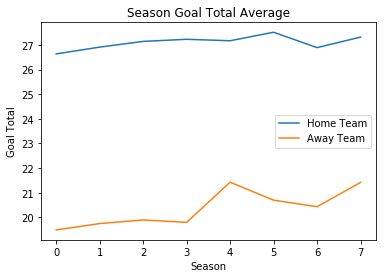

In [9]:
'4'
def getHomeAwayGoalAvg():
    ### arrays to store avg amount of goals scored for home teams and away teams, for each season
    home_goals_average_by_season = []
    away_goals_average_by_season = []

    ### adding avg home teams goals scored total for home and away teams, for each season
    x = 0
    while x < len(total_goals_array_of_seasons):
        home_goals_average_by_season.append(total_goals_array_of_seasons[x]['home team goals'].mean())
        away_goals_average_by_season.append(total_goals_array_of_seasons[x]['away team goals'].mean())
        x +=1

    ### plotting averages
    plt.plot(home_goals_average_by_season, label = 'Home Team')
    plt.plot(away_goals_average_by_season, label = 'Away Team')
    plt.title('Season Goal Total Average')
    plt.legend()
    plt.xlabel('Season')
    plt.ylabel('Goal Total')
    plt.show()

getHomeAwayGoalAvg()

__Season Goal Total Average__<br><br>
This shows us the average amount of goals scored for any given team for their home games and their away games, and does this for each of the 8 seasons of data. From this graph, it makes it obviously clear that games played at home will more than likely result in more goals scored compared to the games played away. From the graph, we can see that every season has home teams scoring, on average, about 5-6 more goals over the course of the season than their away games.

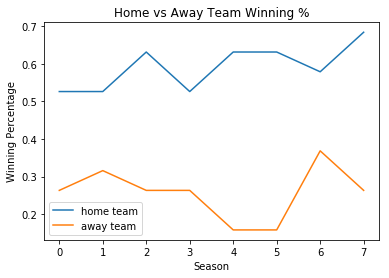

In [10]:
'5'

def winPercentage(year, team):

    home_wins = 0
    home_losses = 0
    home_draws = 0
    away_wins = 0
    away_losses = 0
    away_draws = 0

    if year == 2008:
        x = 0
    elif year == 2009:
        x = 1
    elif year == 2010:
        x = 2
    elif year == 2011:
        x = 3
    elif year == 2012:
        x = 4
    elif year == 2013:
        x = 5
    elif year == 2014:
        x = 6
    elif year == 2015:
        x = 7

    opp_away_goals = []
    opp_home_goals = []
    
    ### adding opponents goals to arrays based on home and away and based on season of choice as well as team of choice
    for index in home_team_goals_array_of_dfs[x].loc[home_team_goals_array_of_dfs[x]['home team id'] == team, 'home team goals'].index:
        opp_home_goals.append(Match.loc[index, 'home_team_goal'])

    for index in away_team_goals_array_of_dfs[x].loc[away_team_goals_array_of_dfs[x]['away team id'] == team, 'away team goals'].index:
        opp_away_goals.append(Match.loc[index, 'away_team_goal'])

    ### comparing team of choice goals to opponents goals on a match basis to determine result of match    
    counter = 0
    while counter < len(opp_away_goals):
        if home_team_goals_array_of_dfs[x].loc[home_team_goals_array_of_dfs[x]['home team id'] == team, 'home team goals'].iloc[counter] > opp_away_goals[counter]:
            home_wins +=1
        elif home_team_goals_array_of_dfs[x].loc[home_team_goals_array_of_dfs[x]['home team id'] == team, 'home team goals'].iloc[counter] < opp_away_goals[counter]:
            home_losses += 1
        elif home_team_goals_array_of_dfs[x].loc[home_team_goals_array_of_dfs[x]['home team id'] == team, 'home team goals'].iloc[counter] == opp_away_goals[counter]:
            home_draws += 1
        counter +=1
    
    ### comparing team of choice goals to opponents goals on a match basis to determine result of match    
    counter2 = 0
    while counter2 < len(opp_home_goals):
        if away_team_goals_array_of_dfs[x].loc[away_team_goals_array_of_dfs[x]['away team id'] == team, 'away team goals'].iloc[counter2] > opp_home_goals[counter2]:
            away_wins +=1
        elif away_team_goals_array_of_dfs[x].loc[away_team_goals_array_of_dfs[x]['away team id'] == team, 'away team goals'].iloc[counter2] < opp_home_goals[counter2]:
            away_losses += 1
        elif away_team_goals_array_of_dfs[x].loc[away_team_goals_array_of_dfs[x]['away team id'] == team, 'away team goals'].iloc[counter2] == opp_home_goals[counter2]:
            away_draws += 1
        counter2 +=1
        
    home_winpercentage = (home_wins/(home_wins+home_losses+home_draws))
    away_winpercentage = (away_wins/(away_wins+away_losses+away_draws))
    
    return home_winpercentage, away_winpercentage

def plotHomeTeamAdvantage(team):
    year0 = winPercentage(2008, team)
    year1 = winPercentage(2009, team)
    year2 = winPercentage(2010, team)
    year3 = winPercentage(2011, team)
    year4 = winPercentage(2012, team)
    year5 = winPercentage(2013, team)
    year6 = winPercentage(2014, team)
    year7 = winPercentage(2015, team)

    home_percentages = [year0[0], year1[0], year2[0], year3[0], year4[0], year5[0], year6[0], year7[0]]
    away_percentages = [year0[1], year1[1], year2[1], year3[1], year4[1], year5[1], year6[1], year7[1]]
    plt.plot(home_percentages, label = 'home team')
    plt.plot(away_percentages, label = 'away team')
    plt.legend()
    plt.xlabel('Season')
    plt.ylabel('Winning Percentage')
    plt.title('Home vs Away Team Winning %')
    plt.show()

plotHomeTeamAdvantage(8633)

__Home vs Away Team Winning %__ <br><br>
This chart shows us some information that isn't too surprising after looking at the previous chart showing the goals scored. From this graph, we can conclude that there is a benefit to being home team, as it produces an average winning percentage of about double than away teams. On average, away teams win 30% or less of their away games. (Season 6 being the outlier with about 40%) However, home teams win more than 50% of their games at home on average, with most seasons being at least 60%. 

### Interesting Facts from Data

#### Height
    1 - Average height
    2 - Tallest Player
    3 - Shortest Player
    4 - Graph illustrating all players' heights


Average height = 181 cm.
The tallest player is ['Kristof van Hout']. He is 208 cm tall.
The shortest player is ['Juan Quero']. He is 157 cm tall.


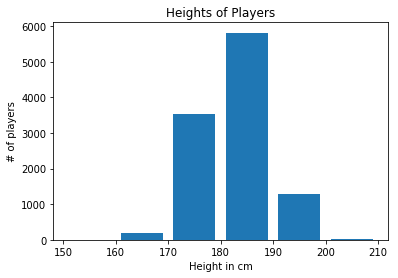

In [11]:
def getAverageTallestShortestHeights():
    print("Average height = " + str(int(Complete_Player.height.mean())) + " cm.")

    Tallest_Player_Info = Complete_Player.loc[Complete_Player['height'] == Complete_Player.height.max(), 'player_name']
    print("The tallest player is " + str(Tallest_Player_Info.values) + ". He is " + str(int(Complete_Player.height.max())) + " cm tall." )

    Shortest_Player_Info = Complete_Player.loc[Complete_Player['height'] == Complete_Player.height.min(), 'player_name']
    print("The shortest player is " + str(Shortest_Player_Info.values) + ". He is " + str(int(Complete_Player.height.min())) + " cm tall." )

def graphPlayerHeights():
    bins = [150, 160, 170, 180, 190, 200, 210]
    plt.hist(Complete_Player.height.values, bins, histtype='bar', rwidth=0.8)
    plt.xlabel('Height in cm')
    plt.ylabel('# of players')
    plt.title("Heights of Players")
    plt.show()

getAverageTallestShortestHeights()
graphPlayerHeights()

__Height of Players__<br><br>
This chart gives us a visual of where the majority of players fall in terms of how tall they are. Heights are divided into bins of 10 cm difference, and this graph shows us that the clear frontrunner of common heights among players is in between 180 and 190 cm. 

#### Age
    1 - Average Age
    2 - Oldest Player
    3 - Youngest Player
    4 - Graph illustrating all players' ages


The average age of all players is 31 years old.
The mode age of all players is 30 years old.
The median age of all players is 31 years old.
The oldest player is ['Alberto Fontana']. He is 51 years old.
The youngest player is ['Alban Lafont' 'Gianluigi Donnarumma' 'Jonathan Leko']. They are all 19 years old.


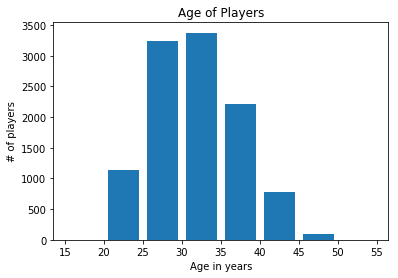

In [12]:
def playerAgeAverageModeMedian():
    average_age_of_players = Complete_Player.age.mean()
    print("The average age of all players is " + str(int(average_age_of_players)) + " years old.")
    mode_age_of_all_players = Complete_Player.age.mode()
    print("The mode age of all players is " + str(int(mode_age_of_all_players)) + " years old.")
    median_age_of_all_players = Complete_Player.age.median()
    print("The median age of all players is " + str(int(median_age_of_all_players)) + " years old.")

def oldestAndYoungestPlayers():
    oldest_player = Complete_Player.age.max()
    oldest_player_name = Complete_Player.loc[Complete_Player['age'] == oldest_player, 'player_name']
    print("The oldest player is " + str(oldest_player_name.values) + ". He is " + str(int(oldest_player)) + " years old.")

    youngest_player = Complete_Player.age.min()
    youngest_player_name = Complete_Player.loc[Complete_Player['age'] == youngest_player, 'player_name']
    print("The youngest player is " + str(youngest_player_name.values) + ". They are all " + str(int(youngest_player)) + " years old.")
    
def graphThatShowsPlayerAges():
    bins = [15, 20, 25, 30, 35, 40, 45, 50, 55]
    plt.hist(Complete_Player.age.values, bins, histtype='bar', rwidth=0.8)
    plt.xlabel('Age in years')
    plt.ylabel('# of players')
    plt.title("Age of Players")
    plt.show()
    

playerAgeAverageModeMedian()
oldestAndYoungestPlayers()
graphThatShowsPlayerAges()

__Age of Players__<br><br>
The graph illustrated here shows us the age differences in players and the amount of those players in each age group. As you can see, the most common age groups are in between 30 and 35 as well as in between 25 and 30. What surprised me was the higher than I predicted amount of players over the age of 45. This is such an old age to be competing with younger players that it surprised me to see so many. 

#### Goals 
    1. Most Goals scored by an away team
        a - How many goals?
        b - Who was the team that did it?
        c - Who did they do it against?
        d - When did it occur?
    

In [13]:
def awayTeamMostGoalsScoredDetail():
    print("The most goals scored by an away team is " + str(Match.away_team_goal.max()) + " goals.")

    most_away_goals_team_apis = Match.loc[Match['away_team_goal'] == Match.away_team_goal.max()].away_team_api_id.values
    most_away_goals_team_name = Complete_Team.loc[Complete_Team['team_api_id'] == int(most_away_goals_team_apis), 'team_long_name']
    print("The team that did this was " + str(most_away_goals_team_name.values))

    team_let_up_most_away_team_goals = Match.loc[Match['away_team_goal'] == Match.away_team_goal.max()].home_team_api_id
    team_name_let_up_most_away_team_goals = Complete_Team.loc[Complete_Team['team_api_id'] == int(team_let_up_most_away_team_goals)].team_long_name
    print("The home team that let this happen was " + str(team_name_let_up_most_away_team_goals.values))
    print("This happend on " + str(Match.loc[Match['away_team_goal'] == Match.away_team_goal.max()].date.values))

awayTeamMostGoalsScoredDetail()

The most goals scored by an away team is 9 goals.
The team that did this was ['Paris Saint-Germain']
The home team that let this happen was ['ES Troyes AC']
This happend on ['2016-03-13 00:00:00']


#### Goals  (cont'd)

    2. Most goals scored by a home team
        a - How many goals?
        b - Who was the team that did it?
        c - Who did they do it against?
        d - When did it occur?

In [14]:
def homeTeamMostGoalsScoredDetail():
    
    print("The most goals scored by a home team is " + str(Match.home_team_goal.max()) + " goals.")

    most_home_goals_team_apis = Match.loc[Match['home_team_goal'] == Match.home_team_goal.max()].home_team_api_id.values
    most_home_goals_team_name = Complete_Team.loc[Complete_Team['team_api_id'] == int(most_home_goals_team_apis[0]), 'team_long_name']
    most_home_goals_team_name2 = Complete_Team.loc[Complete_Team['team_api_id'] == int(most_home_goals_team_apis[1]), 'team_long_name']
    print("The team that did this was " + str(most_home_goals_team_name.values) + " and " + str(most_home_goals_team_name2.values))

    teams_let_up_most_home_team_goals = Match.loc[Match['home_team_goal'] == Match.home_team_goal.max()].away_team_api_id
    team_name_let_up_most_home_team_goals = Complete_Team.loc[Complete_Team['team_api_id'] == int(teams_let_up_most_home_team_goals.values[0])].team_long_name
    team_name_let_up_most_home_team_goals2 = Complete_Team.loc[Complete_Team['team_api_id'] == int(teams_let_up_most_home_team_goals.values[1])].team_long_name
    print("The away teams that let this happen were " + str(team_name_let_up_most_home_team_goals.values) +
         " and " + str(team_name_let_up_most_home_team_goals2.values))

    print("This happend on " + str(Match.loc[Match['home_team_goal'] == Match.home_team_goal.max()].date.values))
    
homeTeamMostGoalsScoredDetail()    

The most goals scored by a home team is 10 goals.
The team that did this was ['PSV'] and ['Real Madrid CF']
The away teams that let this happen were ['Feyenoord'] and ['Rayo Vallecano']
This happend on ['2010-10-24 00:00:00' '2015-12-20 00:00:00']


#### Goals  (cont'd)   
    3. Most goals scored overall in season
    4. Least goals scored by team in season
    5. Top scoring teams by year of my choosing
    6. Table showing all season and top ten scoring
        a - Goal amounts for top ten scoring teams
        b - Team names for top ten scoring teams
    7. Sum of top ten scoring teams' goals and how its changed by season, illustrated by graph
    8. Show me the # of seasons each team has been in the top 10 scoring 
    9. Show me the change in total scoring for the top two scoring teams in last 8 seasons


#### Goals (cont'd)

    3. Most goals scored overall in season


In [15]:
def mostGoalsInSeason():
    max_goals = 0
    counter = 0
    ### check each total goals dataframe and looking for highest season goals total
    while counter < len(total_goals_array_of_seasons):
        if total_goals_array_of_seasons[counter]['total goals'].max() > max_goals:
            max_goals = total_goals_array_of_seasons[counter]['total goals'].max()
        counter += 1
    print("The most amount of goals scored by a team in a season is " + str(max_goals))
mostGoalsInSeason()


The most amount of goals scored by a team in a season is 121


#### Goals  (cont'd)

    4. Least goals scored by team in season


In [16]:
def leastGoalsInSeason():
    min_goals = 1000
    counter = 0
    ### check each total goals dataframe and looking for lowest season goals total
    while counter < len(total_goals_array_of_seasons):
        if total_goals_array_of_seasons[counter]['total goals'].max() < min_goals:
            min_goals = total_goals_array_of_seasons[counter]['total goals'].min()
        counter += 1
    print("The least amount of goals scored by a team in a season is " +str(min_goals))

leastGoalsInSeason()

The least amount of goals scored by a team in a season is 17


#### Goals  (cont'd)

    5. Top scoring teams by year of my choosing


In [22]:
def getTopScoringTeams(year):
    table = pd.DataFrame()
    if year == 2008:
        table = total_goals_2008.nlargest(10, 'total goals', keep = 'first')
    elif year == 2009:
        table = total_goals_2009.nlargest(10, 'total goals', keep = 'first')
    elif year == 2010:
        table = total_goals_2010.nlargest(10, 'total goals', keep = 'first')
    elif year == 2011:
        table = total_goals_2011.nlargest(10, 'total goals', keep = 'first')
    elif year == 2012:
        table = total_goals_2012.nlargest(10, 'total goals', keep = 'first')
    elif year == 2013:
        table = total_goals_2013.nlargest(10, 'total goals', keep = 'first')
    elif year == 2014:
        table = total_goals_2014.nlargest(10, 'total goals', keep = 'first')
    elif year == 2015:
        table = total_goals_2015.nlargest(10, 'total goals', keep = 'first')
    return table



getTopScoringTeams(2014)

,home team goals,match month,away team goals,match month,total goals
8633,65,107,53,112,118
8634,64,117,46,112,110
8640,50,116,42,103,92
9772,48,100,38,97,86
9925,50,134,34,111,84
9931,43,115,41,119,84
8456,44,123,39,132,83
9847,52,121,31,127,83
9823,46,119,34,111,80
8592,40,128,36,119,76


#### Goals  (cont'd)

    6. Table showing all season and top ten scoring
        a - Goal amounts for top ten scoring teams
        b - Team names for top ten scoring teams


In [25]:
'a'
### creating dataframe that shows ALL SEASONS and the goals scored for top 10 scoring teams by season
def getTopScoringTeams():
    all_seasons_top_scoring = pd.DataFrame({
        '2008': pd.Series(total_goals_2008['total goals']).nlargest(10).values,
        '2009': pd.Series(total_goals_2009['total goals']).nlargest(10).values,
        '2010': pd.Series(total_goals_2010['total goals']).nlargest(10).values,
        '2011': pd.Series(total_goals_2011['total goals']).nlargest(10).values,
        '2012': pd.Series(total_goals_2012['total goals']).nlargest(10).values,
        '2013': pd.Series(total_goals_2013['total goals']).nlargest(10).values,
        '2014': pd.Series(total_goals_2014['total goals']).nlargest(10).values,
        '2015': pd.Series(total_goals_2015['total goals']).nlargest(10).values,
    })
    return all_seasons_top_scoring

'b'
### function to match team long name to team api id
def getTeamName(index):
    team_long_name = Complete_Team['team_long_name'].loc[Complete_Team['team_api_id'] == index].values
    return team_long_name
def getTeamNames(df):
    return df.applymap(getTeamName)
### creating dataframe that shows ALL SEASONS and team names for top 10 scoring teams by season
all_seasons_top_scoring_teams = pd.DataFrame({
    '2008': pd.Series(total_goals_2008['total goals']).nlargest(10).index,
    '2009': pd.Series(total_goals_2009['total goals']).nlargest(10).index,
    '2010': pd.Series(total_goals_2010['total goals']).nlargest(10).index,
    '2011': pd.Series(total_goals_2011['total goals']).nlargest(10).index,
    '2012': pd.Series(total_goals_2012['total goals']).nlargest(10).index,
    '2013': pd.Series(total_goals_2013['total goals']).nlargest(10).index,
    '2014': pd.Series(total_goals_2014['total goals']).nlargest(10).index,
    '2015': pd.Series(total_goals_2015['total goals']).nlargest(10).index,
})


getTeamNames(all_seasons_top_scoring_teams)


,2008,2009,2010,2011,2012,2013,2014,2015
0,[FC Barcelona],[Ajax],[Real Madrid CF],[Real Madrid CF],[FC Barcelona],[Real Madrid CF],[Real Madrid CF],[FC Barcelona]
1,[BSC Young Boys],[Chelsea],[FC Barcelona],[FC Barcelona],[Real Madrid CF],[Manchester City],[FC Barcelona],[Real Madrid CF]
2,[Real Madrid CF],[Real Madrid CF],[Rangers],[Manchester City],[PSV],[Celtic],[PSV],[Paris Saint-Germain]
3,[VfL Wolfsburg],[FC Barcelona],[Celtic],[Ajax],[FC Bayern Munich],[Liverpool],[SL Benfica],[Celtic]
4,[Atlético Madrid],[FC Basel],[FC Bayern Munich],[Manchester United],[Celtic],[FC Barcelona],[Celtic],[PSV]
5,[Celtic],[Manchester United],[PSV],[PSV],[Manchester United],[FC Bayern Munich],[FC Basel],[SL Benfica]
6,[FC Zürich],[Arsenal],[Manchester United],[Celtic],[Ajax],[Paris Saint-Germain],[Manchester City],[FC Basel]
7,[Rangers],[Rangers],[FC Basel],[FC Twente],[Borussia Dortmund],[Borussia Dortmund],[Paris Saint-Germain],[Roma]
8,[Liverpool],[SL Benfica],[FC Zürich],[Borussia Dortmund],[SL Benfica],[Juventus],[FC Bayern Munich],[Borussia Dortmund]
9,[RSC Anderlecht],[BSC Young Boys],[FC Porto],[SC Heerenveen],[Chelsea],[Napoli],[Olympique de Marseille],[Ajax]


__Top Scoring Teams__<br><br>
This is a really neat table to look at. It shows us the teams that fell in the top ten as far as number of goals scored during the season. Its neat to look at because you can quickly scan the table and see team names repeating as they appear in multiple seasons top ten scoring. What is amazing to see is Barcelona and Real Madrid showing up at the top of the list every season, with the exception of 2009, where they finished 3rd and 4th. 

#### Goals  (cont'd)
    7. Sum of top ten scoring teams' goals and how its changed by season, illustrated by graph


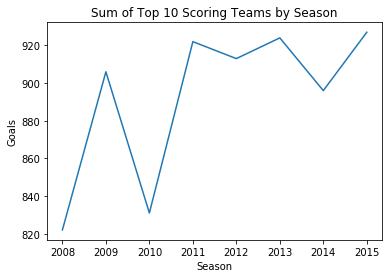

In [19]:
### getting sum of top ten scoring teams goal totals by season
def TopTenTeamsTotalGoals():
    seasons = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
    top_ten_goals_totals_by_seasons = [pd.Series(total_goals_2008['total goals']).nlargest(10).values.sum(),
                                      pd.Series(total_goals_2009['total goals']).nlargest(10).values.sum(),
                                      pd.Series(total_goals_2010['total goals']).nlargest(10).values.sum(),
                                      pd.Series(total_goals_2011['total goals']).nlargest(10).values.sum(),
                                      pd.Series(total_goals_2012['total goals']).nlargest(10).values.sum(),
                                      pd.Series(total_goals_2013['total goals']).nlargest(10).values.sum(),
                                      pd.Series(total_goals_2014['total goals']).nlargest(10).values.sum(),
                                      pd.Series(total_goals_2015['total goals']).nlargest(10).values.sum()]

    ### graph that shows how the total amount of goals scored by top 10 teams has changed by season
    plt.plot(seasons,top_ten_goals_totals_by_seasons)
    plt.xlabel('Season')
    plt.ylabel('Goals')
    plt.title('Sum of Top 10 Scoring Teams by Season')
    plt.show()

TopTenTeamsTotalGoals()

__Sum of Top 10 Scoring Teams by Season__<br><br>
In an effort to further analyze the top scoring teams, this chart was built to illustrate the amount of goals scored in total by the top ten teams. The graph shows how the total amount of 'offense' has changed for this group of teams over the years. In most seasons, more than 900 goals were scored by the top ten scoring teams. 

#### Goals  (Cont'd)

       8. Show me the # of seasons each team has been in the top 10 scoring 


In [20]:
def ListTimesTeamsInTopTen():
    counted = []
    seen_again = []
    total_count_of_team = []
    seasons_counting_teams = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    x = 0
    while x < len(seasons_counting_teams):
        for item in all_seasons_top_scoring_teams[seasons_counting_teams[x]]:
            if item not in counted:
                counted.append(item)
            elif item in counted:
                seen_again.append(item)
        x+=1

    for x in counted:
        total_count_of_team.append(seen_again.count(x))

    total_count_of_team = np.array(total_count_of_team)
    total_count_of_team = total_count_of_team + 1

    times_in_top_ten = pd.DataFrame(data = {'team id': counted, 'count': total_count_of_team})
    times_in_top_ten.sort_values('count', ascending = False)
    count = 0
    while count < len(counted):
        times_in_top_ten.loc[times_in_top_ten['team id'] == counted[count], 'team name'] = Complete_Team.loc[Complete_Team['team_api_id'] == counted[count], 'team_long_name'].values
        count +=1

    times_in_top_ten.sort_values('count', ascending=False)

ListTimesTeamsInTopTen()

#### Goals  (cont'd)

    9. Show me the change in total scoring for the top two scoring teams in last 8 seasons


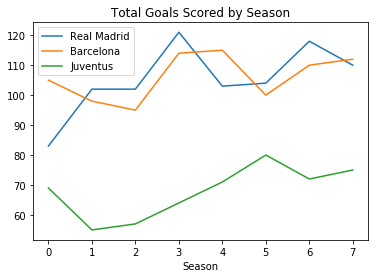

In [21]:
def ShowRealBarceJuvGoalsbySeason():
    real_madrid = 8633
    barcelona = 8634
    juventus = 9885
    real_madrid_goals = []
    barcelona_goals = []
    juventus_goals = []
    x =0
    #adding season goal totals by season to appropriate list
    while x < len(total_goals_array_of_seasons):
        real_madrid_goals.append(total_goals_array_of_seasons[x].loc[real_madrid, 'total goals'])
        barcelona_goals.append(total_goals_array_of_seasons[x].loc[barcelona, 'total goals'])
        juventus_goals.append(total_goals_array_of_seasons[x].loc[juventus, 'total goals'])
        x+=1

    plt.plot(real_madrid_goals, label = 'Real Madrid')
    plt.plot(barcelona_goals, label = 'Barcelona')
    plt.plot(juventus_goals, label = 'Juventus')
    plt.legend()
    plt.title('Total Goals Scored by Season')
    plt.xlabel('Season')

    plt.show()

ShowRealBarceJuvGoalsbySeason()

__Total Goals Scored by Season__<br><br>
After seeing Real Madrid and Barcelona in the top ten every year, I wanted to investigate them a little more. This graph shows the total number of goals scored by these two teams every season. And to put it in perspective, I added another team that showed up in the top ten a couple of times, Juventus. Real Madrid and Barcelona have a very close relationship, with each team scoring in between about 90 and 110 goals a season. These are the superpower teams and their results. Juventus is more of an average to good team, and schores roughly 70 goals a game. 

### Section 4: Conclusions

After exploring this data and addressing the questions I've stated above, I can make several conclusions regarding what I've learned.

1. In regards to individual players and their attributes, I've determined that certain characteristics influence other characteristics. For example, in my analysis, I've come to the conclusion that the age of a player will affect the speed of a player. The older the player, the more likely that the overall sprint speed will be lower. This is proven by looking at all players' age and sprint speed, taking the values, and finding a negative correlation of .37. Its not a super strong correlation, but it does indicate a relatively strong correlation. Another example of player attibutes is how height correlates to sprint speed and strength of a player. I've concluded that the taller a player, the slower the sprint speed, as well as the taller the player, the stronger. This is demonstrated in the correlation equation, which shows that height is negatively correlated to sprint speed by .44, and is positively correlated with strength by .58.
<br>
<br>
2. Another conclusion I have made from analyzing this data is that home teams are more likely to score more goals throughout the season than away teams. To prove this, I derived the average amount of goals scored in a season for home teams and the average amount of goals scored in a season for away teams. After doing this for each season, I graphed the results, which clearly show a 6-7 goal difference in home team vs away team average goals scored in each of the 8 seasons. I can also conclude that home teams are also more likely to win as opposed to away teams. This was demonstrated by cycling through each season of matches and determining the winner of each match by looking at home goals scored and away goals scored. After this, I took the winning percentage of home teams and the winning percentage of away teams. This was done for each season, with the results illustrated in a graph. The graph shows each season and the winning percentage of away teams vs the winning percentage of home teams. In each season, the home team won significantly more games than the away team.
<br>
<br>
3. I've also made some conclusions regarding some interesting facts from the data:
<br>
<br>
*Players*<br>
The average height of a player is 181 cm. The tallest player in soccer is Kristof van Hout, standing at 208 cm tall. The shortest player is Juan Quero, standing at 157 cm tall. Additionally, I displayed the heights of all players in a histogram bar chart. From this chart, I can conclude that the vast majority of players are in between 180 and 190 cm tall. This group of players outnumbers the next closest group of players (170-180cm) by almost 2 times, and the next closest group (190-200cm) by almost 6 times.<br>
I've also derived some pretty cool insights regarding player age. I've discovered that the average age of all players is 31 years old, which also happens to be the median. The mode age of all players is 30. I learned that the oldest player is Alberto Fontana, at the age of 51. The youngest players are 19 years old, and they are Alban Lafont, Gianluigi Donnarumma', and Jonathan Leko. What really surprised me was the graph that I made illustrating the players' ages. In the graph, I was suprised to see so many older players. For example, there was a large number of players over the age of 45! Also, the most common age group of players is in between 30-35 years old. This seems so old for professional soccer players!<br>
<br>
*Teams*<br>
When it comes to teams and their performances, I've come to some fascinating conclusions after looking at the data. I wanted to know who scored the most goals in a game as an away team and as a home team. The results I got show that the most goals scored by an away team is 9 goals. This was done by Paris Saint-Germain on March 13th, 2016, and was done against the home team ES Troyes AC. The most goals scored by a home team is 10 goals (happened on two seperate occasions). The teams to have done this are PSV and Real Madrid CF. PSV did it against Feyenoord on October 24th, 2010, while Real Madrid did it against Rayo Vallecano on December 20th, 2015. <br>
I continued to look at teams and goals scored, and discovered that the lowest total amount of goals scored in a season is 17. On the contrary, the largest amount of goals scored in one season was 121. This was a surpising difference, and led me to look further into which teams have scored the most goals over the seasons. What I discovered was that Real Madrid and Barcelona were always at the top of the list in terms of goals scored. Barcelona led the league in scoring 3 out of 8 seasons, while Real Madrid led 4 seasons. This really stood out to me, as it has a high degree of difficulty to be the leading scoring team in a season. It shows how dominant these two teams are. This led me to do a little more digging on these two teams. I graphed the amount of goals scored by these two teams, while also graphing the goals scored by another team that only appeared in the top ten once (representing a more 'average' team to compare against). Barcelona and Real Madrid lines follow each other pretty close, while the Juventus line is much much lower. Additionally, I created a table that showed the amount of times a team was in the top ten in scoring for a season. Real Madrid and Barcelona were in the top ten in every single season! Again, this draws me to the conlusion of how dominant Barcelona and Real Madrid is.
<br>
<br>
*Overall Conclusions*<br>
Overall, I can conclude a few things. Player height and age do correlate with things like speed and strength. The age of players playing soccer is much higher than I thought, leading me to believe that players can have potentially very long careers in soccer. Also, I can conclude that being a home team is far more beneficial than being an away team. You are more likely to score more goals in a season as well as much more likely to win as a home team. I've also come to the conlcusion that Barcelona and Real Madrid are the two most dominant teams. They have scored the most goals over 8 seasons and conssitently show up in the top ten scoring list. Lastly, I graphed the total goals scored by top ten scoring teams in each season, and can conclude that the overall trend in goals scored is going up. <br>
<br>
*Limitations*<br>
There were a few things the data didn't provide that I wish I could look at. One things is the team that the player is on. I can't look at things like "when this player scores, does the team have a better chance of winning?". Also, it doesn't show who scored the goals. I can't look at who scored the most goals in a season, or the relationship between a team winning and a player scoring. 